"Download datasettet fra dette link.
https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies 

1. Find the top 10 highest grossing Disney movies measured by world sales

2. Create a pie chart that shows the distribution of Licenses (PG, R, M and so on)

3. Get the percentage of PG rated movies between 2001 and 2015

4. Calculate the average of world sales for each genre and visualize the data with a bar chart. (Hint: use groupBy)
"


In [25]:
from matplotlib import pyplot as plt
from collections import OrderedDict
import numpy as np
import pandas as pd 
movieData = pd.read_csv('Highest Holywood Grossing Movies.csv', sep=',')
movieData = movieData.fillna('None')
print('*****Opgave 1*****')
top10Disneys = movieData [['Title','Distributor','World Sales (in $)']]
top10Disneys = top10Disneys[top10Disneys['Distributor'].isin(['Walt Disney Studios Motion Pictures'])]
top10Disneys = top10Disneys.sort_values('World Sales (in $)', ascending=False)[['Title', 'World Sales (in $)']][:10]
print(top10Disneys)



*****Opgave 1*****
                                                Title  World Sales (in $)
1                            Avengers: Endgame (2019)          2797501328
0   Star Wars: Episode VII - The Force Awakens (2015)          2069521700
4                       Avengers: Infinity War (2018)          2048359754
11                               The Lion King (2019)          1662899439
8                                 The Avengers (2012)          1518815515
17                                   Frozen II (2019)          1450026933
20                     Avengers: Age of Ultron (2015)          1402809540
3                                Black Panther (2018)          1347597973
9      Star Wars: Episode VIII - The Last Jedi (2017)          1332698830
39                                      Frozen (2013)          1281508100


*****Opgave 2*****
{'PG-13': 363, 'G': 14, 'R': 194, 'PG': 173, '´None': 174}


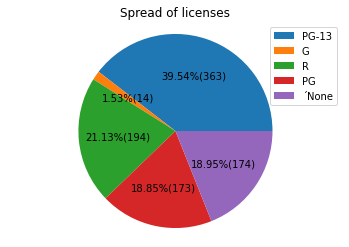

In [26]:
print('*****Opgave 2*****')

licensechart = pd.DataFrame(movieData[['License']])

itemcount = licensechart['License'].value_counts()
pieData={
    "PG-13":itemcount.get('PG-13'),
    "G":itemcount.get('G'),
    "R":itemcount.get('R'),
    "PG":itemcount.get('PG'),
    "´None":itemcount.get('None')
}
#print(pieData)
labels = []
sizes =[]
for x, y in pieData.items():
    labels.append(x)
    sizes.append(y)

    
plt.pie(x = sizes,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(pieData.values())))
plt.legend(pieData.keys(),loc= 'upper right')
plt.axis('equal')
plt.title('Spread of licenses')
plt.show()

In [39]:
print('*****Opgave 3*****')
licenseData = movieData[['License','Release Date']]
#change release date to year
licenseData[['Release Date', 'Year']] = licenseData['Release Date'].str.split(',',1,expand=True)
licenseData_filtered = licenseData[(licenseData['Year'] >=" 2001") & (licenseData['Year'] < " 2015")]

licenseData = licenseData_filtered['License'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
print('PG movies between 2001 and 2015 in percentage: ' + df1.iloc[1])

*****Opgave 3*****
PG movies between 2001 and 2015 in percentage: 23.1%


*****Opgave 4*****
Average revenue per Genre:
Action :  8561990580.045455
Adventure :  10430463652.227272
Animation :  3031962758.681818
Biography :  452152892.72727275
Comedy :  5954954424.545455
Crime :  1879859569.2727273
Documentary :  17915121.545454547
Drama :  4498354052.772727
Family :  4477668660.681818
Fantasy :  5075334378.318182
History :  290847244.8181818
Horror :  558581913.4090909
Music :  463572021.27272725
Musical :  1042243339.0454545
Mystery :  1417154250.6818182
Romance :  2119389718.2272727
Sci-Fi :  5570594364.5
Sport :  293329349.8181818
Thriller :  3770262144.318182
War :  329542916.22727275
Western :  168982437.5909091


<function matplotlib.pyplot.show(*args, **kw)>

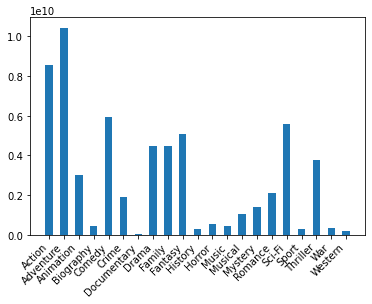

In [58]:
print('*****Opgave 4*****')

genreDF = movieData['Genre'].str.replace("(\[|\]|\ |')","")
genreDF = genreDF.str.get_dummies(sep=',')

#Total amount of movies per Genre
genreDist = genreDF.sum().to_dict()
#print (genreDist)

#Revenue per Genre
worldSalesPerGenreDF = genreDF.mul(df["World Sales (in $)"], axis=0)
revenuePerGenre = worldSalesPerGenreDF.sum().to_dict()
#print(RevenuePerGenre)

avgRev = {}
print("Average revenue per Genre:")
for (k,v), (k2,v2) in zip(genreDist.items(), revenuePerGenre.items()):
    avgRevenue = v2 / v1
    avgRev[k] = avgRevenue
    print (k,': ',avgRev[k])



plt.bar(avgRev.keys(),avgRev.values(),width=0.5,align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.show